---
# <font color='blue'> Case Study 2 </font>

## <font color='blue'>Group</font>
* Helene Barrera
* Sam Vonpaays Soh
* Justin Ehly
---

## <font color='blue'>Business Understanding</font>
The objective of this project is to build a classifier using logistic regression to predict hospital readamission within 30-days of initial hospitalization.

---

## <font color='blue'>Data Evaluation</font>
### <font color='blue'>1. What does the data look like</font>
 - There is 1 dataset that is missing data that will need to be imputed and consists of 101766 rows of data with 49 explanatory variables and 1 response variable called "readmitted". The missing data is marked with a "?".
 - Initially the dataset has 
     * 13 Integer variables
     * 37 object variables
 - Missing Data
     * race = 2,273
     * weight = 98,596 (reported in 25unit increments)
     * payer_code = 40,256 
     * medical_specialty = 49,949
     * diag_1 = 21
     * diag_2 = 358
     * diag_3 = 1,423
 - Data that is not necessarily missing, but unreported is labeled by a number code and mapped to the following values:
     * Not Available, NULL, No Mapped and/or Unknown/Invalid
     * the following variables are known to have these labels
         * admission_description
             - 5 = NULL
             - 6 = Not Mapped
             - 8 = Unknown/Invalid
         * admission_source
             - 15 = Not Available
             - 17 = NULL
             - 20 = Not Mapped
             - 21 = Unknown/Invalid
         * discharge_description
             - 18 = NULL
             - 25 = Not Mapped
             - 26 = Unknown/Invalid
  - There are also 2 identification numbers that can be removed because this model does not require any data mapping
      * encounter_id
      * patient_nbr
 

In [1]:
import numpy as np
import pandas as pd
import os

# pc drive
#os.chdir(r'C:\Users\justi\Google Drive\_SMU\7333 - Quantifying the World\Case Study 2\dataset_diabetes')
# mac drive
#os.chdir('/Users/justinehly/Google Drive/_SMU/7333 - Quantifying the World/Case Study 2/dataset_diabetes')
os.chdir(r'D:\MS in Data Science\Quantifying\Case Study 2\dataset_diabetes')

In [2]:
diab = pd.read_csv('diabetic_data.csv')
diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
diab.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [4]:
diab.drop(columns=['encounter_id','patient_nbr'], axis=1, inplace=True)
diab.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# change all ? to NA
diab.replace('\?', np.nan, inplace = True, regex=True)
diab.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
diab.shape

(101766, 48)

In [7]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

## <font color='blue'>Data Evaluation / Engineering</font>
* Summarize the data being used in the case using appropriate mediums (charts, graphs, tables); address questions such as: 
* Are there missing values? 
* Which variables are needed (which ones are not)? 
* What assumptions or conclusions are you drawing that need to be relayed to your audience?

In [8]:
# convert readmitted to binary
target_labels = diab['readmitted'].unique().tolist()

target_mod = {
        'NO':0,
        '>30':0,
        '<30':1,
    
}

diab ['readmitted_binary'] = diab['readmitted'].map(target_mod)
diab['readmitted_binary'].unique()

diab.drop(columns=['readmitted'], axis=1, inplace=True)
#diab.info()

In [9]:
# what is the difference between yes/ no readmitted
diab.readmitted_binary.value_counts()


0    90409
1    11357
Name: readmitted_binary, dtype: int64

---
---
### <font color='red'>Missing Data</font>
---

In [10]:
# first let's fix the age/ weight columns to be open/close brackets
diab.age = diab.age.str.replace(')',']', regex=True)
diab.weight = diab.weight.str.replace(')',']', regex=True)
diab.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_binary
0,Caucasian,Female,[0-10],NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20],NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30],NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40],NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50],NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [11]:
# check for missing data
missing_values = diab.describe(include='all')

In [12]:
# easier way to count missing values
mv = []
nas = []
for i in missing_values.columns:
    if missing_values.loc['count',i] != diab.shape[0]:
        mv.append(i)
        nas.append(diab[i].isna().sum())

# create df from the lists above
missing_vals = pd.DataFrame(list(zip(mv, nas)), columns=['Feature',
                                             'NaN\'s'])       
print(missing_vals)

             Feature  NaN's
0               race   2273
1             weight  98569
2         payer_code  40256
3  medical_specialty  49949
4             diag_1     21
5             diag_2    358
6             diag_3   1423


In [13]:
diab.age.value_counts()

[70-80]     26068
[60-70]     22483
[50-60]     17256
[80-90]     17197
[40-50]      9685
[30-40]      3775
[90-100]     2793
[20-30]      1657
[10-20]       691
[0-10]        161
Name: age, dtype: int64

#### Race Missing Values
---

There were 2273 missing values for race. This amounts to about 2% of the values missing for this column, which is very small and unlikely to sway our results too much. We used a simple imputation for these values on the mode of race by age. All imputed values were caucasian. We recognize that in different circumstances, more nuance should be taken with regards to imputing by race, since there are real world issues around bias in data models for minorities. However, the methods for such imputations are complicated and use data beyond the scope of this project. 

In [14]:
#find mode for each age group for race
ms = []
for i in diab.age.unique():
    ms.append(diab[diab.age == i][['race']].mode().iloc[0,0])
   
race_ms = pd.DataFrame(list(zip(diab.age.unique(),ms)), columns=['age', 'race_mode'])
race_ms

,age,race_mode
0,[0-10],Caucasian
1,[10-20],Caucasian
2,[20-30],Caucasian
3,[30-40],Caucasian
4,[40-50],Caucasian
5,[50-60],Caucasian
6,[60-70],Caucasian
7,[70-80],Caucasian
8,[80-90],Caucasian
9,[90-100],Caucasian


In [15]:
# replace all missing race values with Caucasian

rdx = np.where(diab.race.isnull())
diab.loc[rdx[0],'race'] = 'Caucasian'


#### Weight missing values
---

There were 98569 missing values for weight - meaning almost 97% of the data for this variable was missing. In many circumstances, it might have been prudent to just delete a column with this much missing data. However, we felt that the importance of weight as a factor in diabeties-related readmissions was too important to disregard so we decided to keep this variable and impute the data using the mode weight for each age group. 

In [16]:
# first let's fix the brackets for the weights


In [17]:
# replace the missing weight values with the mode for each age group
#find mode for each age group for weight
ms = []
for i in diab.age.unique():
    ms.append(diab[diab.age == i][['weight']].mode().iloc[0,0])
   
weight_ms = pd.DataFrame(list(zip(diab.age.unique(),ms)), columns=['age', 'weight_mode'])
weight_ms

,age,weight_mode
0,[0-10],[0-25]
1,[10-20],[50-75]
2,[20-30],[50-75]
3,[30-40],[75-100]
4,[40-50],[75-100]
5,[50-60],[75-100]
6,[60-70],[75-100]
7,[70-80],[75-100]
8,[80-90],[50-75]
9,[90-100],[50-75]


In [18]:
# replace the weights with the mode for each age group
for i in weight_ms.age:
    wdx = np.where((diab.age.isin([i])) & (diab.weight.isnull()))
    diab.loc[wdx[0],'weight'] = weight_ms[weight_ms.age.isin([i])].iloc[0,1]
    


In [19]:
diab.weight.isnull().sum()

0

---
#### Payer_code missing values
---

40256 values were missing amounting to about 40% of the payer_code data missing. We again did a simple imputation using mode per age group. This resulted in some variation, although we don't really know what these codes mean, so we can only guess whether this is a logical impuation method for this column. 

In [20]:
# find mode and replace missing values
ms = []
for i in diab.age.unique():
    ms.append(diab[diab.age == i][['payer_code']].mode().iloc[0,0])
   
payer_ms = pd.DataFrame(list(zip(diab.age.unique(),ms)), columns=['age', 'weight_mode'])
payer_ms

,age,weight_mode
0,[0-10],BC
1,[10-20],MD
2,[20-30],MD
3,[30-40],HM
4,[40-50],MC
5,[50-60],MC
6,[60-70],MC
7,[70-80],MC
8,[80-90],MC
9,[90-100],MC


In [21]:
# replace the missing payer_codes with the mode for each age group
for i in weight_ms.age:
    pdx = np.where((diab.age.isin([i])) & (diab.payer_code.isnull()))
    diab.loc[pdx[0],'payer_code'] = payer_ms[weight_ms.age.isin([i])].iloc[0,1]

In [22]:
diab.payer_code.unique()

array(['BC', 'MD', 'HM', 'MC', 'UN', 'SP', 'CP', 'SI', 'DM', 'CM', 'CH',
       'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

#### Medical_Specialty Missing Values
---
49949 values were missing for this column, which is about 50% of the total values for the column. We also found it odd that there were people well into adulthood who were marked as seeing a pediatrician. Without further clarification available, we removed pediatrics and pediatrician categories from adults age 20 and up, and replaced values with the catch-all InternalMedicine as needed. The mode per age group was used as an imputation method. 

In [23]:
# let's look at the age vs medical specialty
# set up a couple lists for quicker df slicing
peds = ['[0-10]','[10-20]']
non_peds = ['[20-30]', '[30-40]', '[40-50]', '[50-60]', '[60-70]', '[70-80]', '[80-90]', '[90-100]']

age = diab[['age','medical_specialty']].groupby(by=['age', 'medical_specialty'], dropna=False).max()
age.reset_index(inplace=True)
age[(age.age.isin(non_peds)) & (age.medical_specialty.str.contains('Pediatrics')) ]

,age,medical_specialty
61,[20-30],Pediatrics
62,[20-30],Pediatrics-Pulmonology
99,[30-40],Pediatrics
100,[30-40],Pediatrics-Neurology
147,[40-50],Pediatrics
148,[40-50],Pediatrics-Neurology
198,[50-60],Pediatrics
199,[50-60],Pediatrics-Neurology
248,[60-70],Pediatrics
249,[60-70],Pediatrics-Neurology


In [24]:
#find mode for each age group for medical_specialty
ms = []
for i in diab.age.unique():
    ms.append(diab[diab.age == i][['medical_specialty']].mode().iloc[0,0])
   
age_ms = pd.DataFrame(list(zip(diab.age.unique(),ms)), columns=['age', 'med_spec_mode'])
age_ms

,age,med_spec_mode
0,[0-10],Pediatrics-Endocrinology
1,[10-20],Pediatrics-Endocrinology
2,[20-30],InternalMedicine
3,[30-40],InternalMedicine
4,[40-50],InternalMedicine
5,[50-60],InternalMedicine
6,[60-70],InternalMedicine
7,[70-80],InternalMedicine
8,[80-90],InternalMedicine
9,[90-100],InternalMedicine


In [25]:
# replace missing medical_specialty for each age group with the mode of each group from above
# pediatrics
idx = np.where((diab.age.isin(peds)) & (diab.medical_specialty.isnull()))
diab.loc[idx[0],'medical_specialty'] = 'Pediatrics'

#non-pediatrics
idnx = np.where((diab.age.isin(non_peds)) & (diab.medical_specialty.isnull()))
diab.loc[idnx[0],'medical_specialty'] = 'InternalMedicine'

In [26]:
diab.medical_specialty.isnull().sum()

0

In [27]:
# fix the pediatrics labels in medical_specialty for non pediatrics
idxs = np.where((diab.age.isin(non_peds)) & (diab.medical_specialty.str.contains('Pediatrics')))
#idxs
#diab.iloc[480,[4,11]] # quick gut check
# replace the partial string in the hypthenated titles
diab.loc[idxs[0],'medical_specialty'] = diab.loc[idxs[0],'medical_specialty'].str.replace('Pediatrics-','', regex=True)

#replace the whole word Pediatrics with InternalMedicine
diab.loc[idxs[0],'medical_specialty'] = diab.loc[idxs[0],'medical_specialty'].replace('Pediatrics','InternalMedicine')
# verify results
verify = diab[(diab.age.isin(non_peds)) & (diab.medical_specialty.str.contains('Pediatrics'))][['medical_specialty']]
verify.medical_specialty.unique()

array([], dtype=object)

---
#### diag overall assessment


In [28]:
#### find if any rows are missing all diag_# values and remove those
# There is 1 with index 87181
idx = np.where((diab.diag_1.isnull()) & (diab.diag_2.isnull()) & (diab.diag_3.isnull()))
diab.drop(index=idx[0], axis=0, inplace=True)


---
#### diag_1,2,3 missing values
---

diag_1,2 and 3 were missing 21, 358, and 1423 values respectively. Each of these values was imputed using mode by age group. In an actual medical setting, it's likely that you would be able to impute diagnosis codes using the other diagnostic variables provided. However, since we are not subject matter experts, nor do we have access to one, it does not make sense for us to attempt to do so at this time. 

Note: for some reason, about 100 of these valules did not want to be imputed, so we just went ahead and dropped those. 

In [29]:
# find mode and replace missing values
ms = pd.DataFrame()
for i in diab.age.unique():
    ms[i] = ([(diab[diab.age == i][['diag_1']].mode().iloc[0,0]),
              (diab[diab.age == i][['diag_2']].mode().iloc[0,0]),
              (diab[diab.age == i][['diag_3']].mode().iloc[0,0])])
    
ms = ms.T
ms.reset_index(inplace=True)
ms.rename(columns = {'index':'age',0:'diag_1_mode',1:'diag_2_mode',2:'diag_3_mode'}, inplace=True)
print(ms)

# replace the missing diag_1 with the mode for each age group
for i in ms.age:
    p1dx = np.where((diab.age.isin([i])) & (diab.diag_1.isnull()))
    diab.loc[p1dx[0],'diag_1'] = ms[ms.age.isin([i])].iloc[0,1]

    p2dx = np.where((diab.age.isin([i])) & (diab.diag_2.isnull()))
    diab.loc[p2dx[0],'diag_2'] = ms[ms.age.isin([i])].iloc[0,2]

    p3dx = np.where((diab.age.isin([i])) & (diab.diag_3.isnull()))
    diab.loc[p3dx[0],'diag_3'] = ms[ms.age.isin([i])].iloc[0,3]
    

        age diag_1_mode diag_2_mode diag_3_mode
0    [0-10]      250.03         276         276
1   [10-20]      250.13         276         276
2   [20-30]      250.13         276         276
3   [30-40]         786         276         250
4   [40-50]         786         250         250
5   [50-60]         414         250         250
6   [60-70]         414         428         250
7   [70-80]         428         428         250
8   [80-90]         428         428         250
9  [90-100]         428         428         250


In [30]:
diab.isnull().sum()
# still have 83 rows with stubborn NaN that won't change, let's just drop those


race                         0
gender                       0
age                          0
weight                       0
admission_type_id            0
discharge_disposition_id     0
admission_source_id          0
time_in_hospital             0
payer_code                   0
medical_specialty            0
num_lab_procedures           0
num_procedures               0
num_medications              0
number_outpatient            0
number_emergency             0
number_inpatient             0
diag_1                       1
diag_2                      23
diag_3                      73
number_diagnoses             0
max_glu_serum                0
A1Cresult                    0
metformin                    0
repaglinide                  0
nateglinide                  0
chlorpropamide               0
glimepiride                  0
acetohexamide                0
glipizide                    0
glyburide                    0
tolbutamide                  0
pioglitazone                 0
rosiglit

ms

In [31]:
diab.dropna(axis=0, how='any', inplace=True)

In [32]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101682 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101682 non-null  object
 1   gender                    101682 non-null  object
 2   age                       101682 non-null  object
 3   weight                    101682 non-null  object
 4   admission_type_id         101682 non-null  int64 
 5   discharge_disposition_id  101682 non-null  int64 
 6   admission_source_id       101682 non-null  int64 
 7   time_in_hospital          101682 non-null  int64 
 8   payer_code                101682 non-null  object
 9   medical_specialty         101682 non-null  object
 10  num_lab_procedures        101682 non-null  int64 
 11  num_procedures            101682 non-null  int64 
 12  num_medications           101682 non-null  int64 
 13  number_outpatient         101682 non-null  int64 
 14  numb

In [33]:
# reassign data types
cat_variables = diab.select_dtypes(include=['object']).columns

int_variables = diab.select_dtypes(include=['int64']).columns


In [34]:
diab[cat_variables] = diab[cat_variables].astype('category')
#diab.info()


In [35]:
cat_variables = diab.select_dtypes(include=['category']).columns
cat_variables

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

---
#### Combine Not Available, NULL, No Mapped and/or Unkown/Invalid


In [36]:
# reindex
diab.reset_index(inplace=True, drop=True)
# Change 5(Not avaialbe),6(null),8(not mapped) to 5
idx = np.where(diab.admission_type_id.isin([6,8]))
diab.loc[idx[0],'admission_type_id'] = 5

# change 18(null),25(not mapped),26(unknown/invalid) to 18
idx = np.where(diab.discharge_disposition_id.isin([25,26]))
diab.loc[idx[0], 'discharge_disposition_id'] = 18

# change 15, 17, 20, 21 to 15
idx = np.where(diab.admission_source_id.isin([17,20,21]))
diab.loc[idx[0], 'admission_source_id'] = 15



In [37]:
#print(diab.admission_type_id.unique(),'\n',)
#print(diab.discharge_disposition_id.unique(),'\n',)
#print(diab.admission_source_id.unique(),'\n',)

In [38]:
# ordinal encode cat variables
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X = diab[cat_variables].astype('str')
y = diab.readmitted_binary

enc.fit(X)
enc.categories_
X = enc.transform(X)

In [39]:
cat_variables = cat_variables.tolist()
X = pd.DataFrame(X)
X.columns = cat_variables
X= X.join(diab[int_variables])

X

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary
0,2.0,0.0,0.0,1.0,0.0,37.0,124.0,133.0,139.0,2.0,...,1,1,41,0,1,0,0,0,1,0
1,2.0,0.0,1.0,7.0,8.0,33.0,143.0,79.0,121.0,2.0,...,7,3,59,0,18,0,0,0,9,0
2,0.0,0.0,2.0,7.0,8.0,18.0,454.0,78.0,766.0,2.0,...,7,2,11,5,13,2,0,1,6,0
3,2.0,1.0,3.0,8.0,6.0,18.0,554.0,97.0,248.0,2.0,...,7,2,44,1,16,0,0,0,7,0
4,2.0,1.0,4.0,8.0,7.0,18.0,54.0,24.0,86.0,2.0,...,7,1,51,0,8,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101677,0.0,1.0,7.0,8.0,7.0,18.0,102.0,148.0,295.0,2.0,...,7,3,51,0,16,0,0,0,9,0
101678,0.0,0.0,8.0,7.0,7.0,18.0,381.0,133.0,536.0,2.0,...,5,5,33,3,18,0,0,1,9,0
101679,2.0,1.0,7.0,8.0,7.0,18.0,236.0,389.0,159.0,2.0,...,7,1,53,0,9,1,0,0,13,0
101680,2.0,0.0,8.0,7.0,7.0,62.0,693.0,142.0,668.0,2.0,...,7,10,45,2,21,0,0,1,9,0


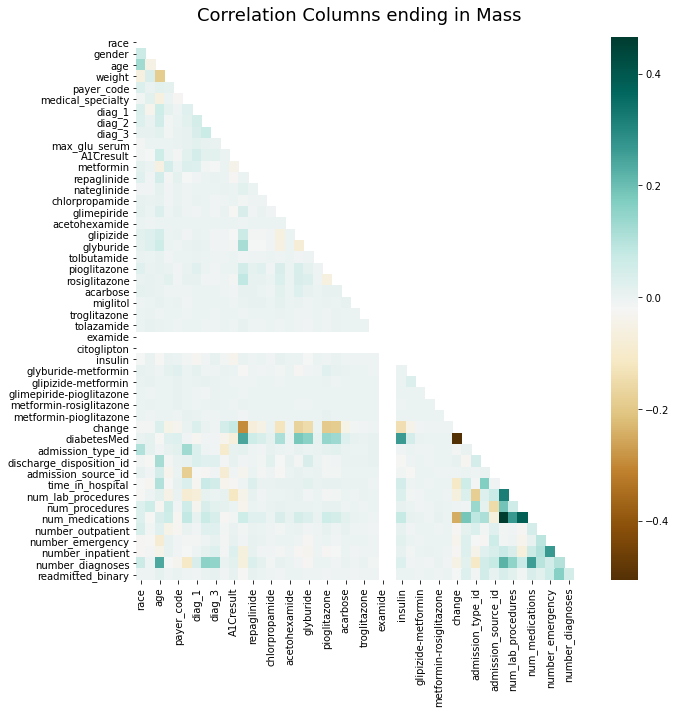

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
matrix = np.triu(corr)


f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=False, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns ending in Mass', fontdict={'fontsize':18}, pad=16);
plt.show()

##### Interpretation
Appears there may be some correlation between 
- num_lab_procedures, num_procedures and num_medications
- age and number_diabnoses

In [41]:
# automating the process of removing highly correlated variables
corr_matrix = X.corr().abs() #get the correlation matrix with absolute values

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # select just the upper triangle of the correlation matrix
print(upper_tri) # view the columns

# get columns with over 0.95 correlation

#use list comprehension to get a list of ultra high correlated variables
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)] 

# print list of variables to drop from dataframe
print('\n',to_drop)
to_drop

# we don't find any correlations that are over 90%


                          race    gender       age    weight  payer_code  \
race                       NaN  0.067112  0.129062  0.060193    0.033156   
gender                     NaN       NaN  0.050556  0.040042    0.003114   
age                        NaN       NaN       NaN  0.189036    0.020669   
weight                     NaN       NaN       NaN       NaN    0.014431   
payer_code                 NaN       NaN       NaN       NaN         NaN   
medical_specialty          NaN       NaN       NaN       NaN         NaN   
diag_1                     NaN       NaN       NaN       NaN         NaN   
diag_2                     NaN       NaN       NaN       NaN         NaN   
diag_3                     NaN       NaN       NaN       NaN         NaN   
max_glu_serum              NaN       NaN       NaN       NaN         NaN   
A1Cresult                  NaN       NaN       NaN       NaN         NaN   
metformin                  NaN       NaN       NaN       NaN         NaN   
repaglinide 

[]

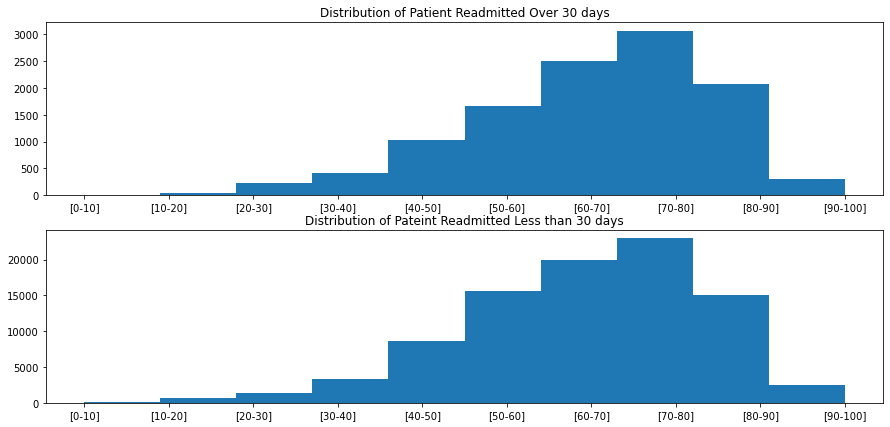

In [42]:
# distribution of age if readmitted 
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
x_labels = enc.categories_[2]
age = X[X.readmitted_binary == 1][['age']]
x = np.sort(age.age.unique()).astype('int')

ax1.hist(age.age)
ax1.set_title('Distribution of Patient Readmitted Over 30 days')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)

age1 = X[X.readmitted_binary == 0][['age']]
x1 = np.sort(age1.age.unique()).astype('int')
ax2.hist(age1.age)
ax2.set_title('Distribution of Pateint Readmitted Less than 30 days')
ax2.set_xticks(x1)
ax2.set_xticklabels(x_labels)


plt.show()


##### Interpretation
We have most of our patients in the 70-80 age range, then 60-70. 50-60 and 80-90 have about the same amount of patients that go into the hospital while the the under 50 patients don't seem to be as likely to need hospitalization.
There are more pateints readmitted overall over 30 days than under 30 days and the number of 80-90 year olds out numbers the 50-60 year olds in patients readmitted over 30 days 



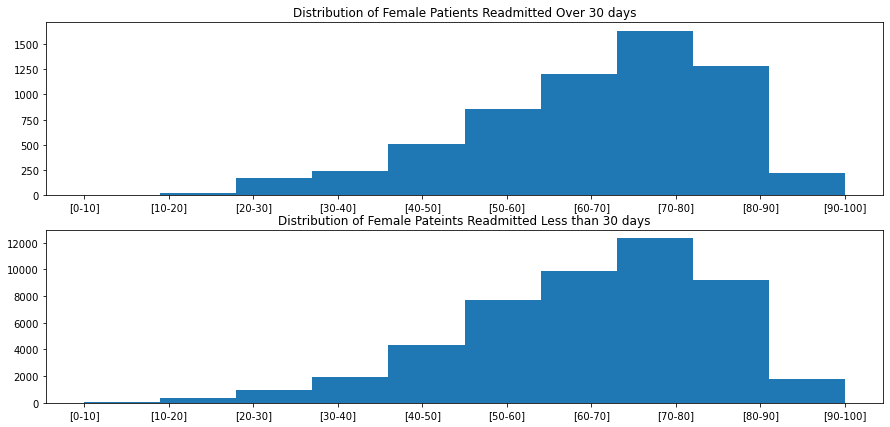

In [43]:
# distribution of age by sex and readmittance
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
x_labels = enc.categories_[2]
age = X[(X.readmitted_binary == 1) &  (X.gender.astype('int') == 0)][['age']]  # 1 = male, 0= female
x = np.sort(age.age.unique()).astype('int')
age1 = X[(X.readmitted_binary == 0) & (X.gender.astype('int') == 0)][['age']]
x1 = np.sort(age1.age.unique()).astype('int')

ax1.hist(age.age)
ax1.set_title('Distribution of Female Patients Readmitted Over 30 days')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)


ax2.hist(age1.age)
ax2.set_title('Distribution of Female Pateints Readmitted Less than 30 days')
ax2.set_xticks(x1)
ax2.set_xticklabels(x_labels)


plt.show()

##### Interpretation
- Female patients appear to have a similar distribution to the overall with more being readmitted less than 30 days.
- by age group the 60-70 year old females seem to be at a higher risk than females 80-90 for being readmitted in under 30 days.
- again the under 50 groups are much less likely to be readmitted.

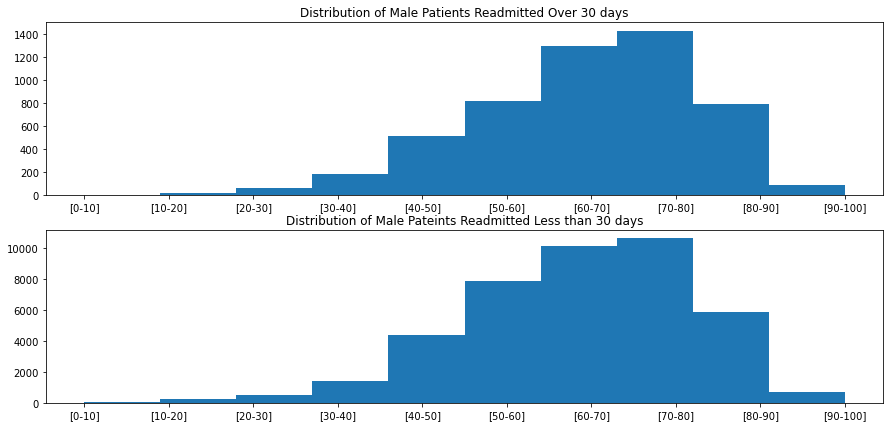

In [44]:
# distribution of age by sex and readmittance
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
x_labels = enc.categories_[2]
age = X[(X.readmitted_binary == 1) &  (X.gender.astype('int') == 1)][['age']]  # 1 = male, 0= female
x = np.sort(age.age.unique()).astype('int')
age1 = X[(X.readmitted_binary == 0) & (X.gender.astype('int') == 1)][['age']]
x1 = np.sort(age1.age.unique()).astype('int')

ax1.hist(age.age)
ax1.set_title('Distribution of Male Patients Readmitted Over 30 days')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)


ax2.hist(age1.age)
ax2.set_title('Distribution of Male Pateints Readmitted Less than 30 days')
ax2.set_xticks(x1)
ax2.set_xticklabels(x_labels)


plt.show()

##### Interpretation

---
- Male patients also have a similar distribution to the overall with more being readmitted less than 30 days.
- A fewer proportion of males than overall seemed to be readmitted past about 90 or so, although there could be confounding factors contributing to this. 

In [45]:
diab.gender

0         Female
1         Female
2         Female
3           Male
4           Male
           ...  
101677      Male
101678    Female
101679      Male
101680    Female
101681      Male
Name: gender, Length: 101682, dtype: category
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']

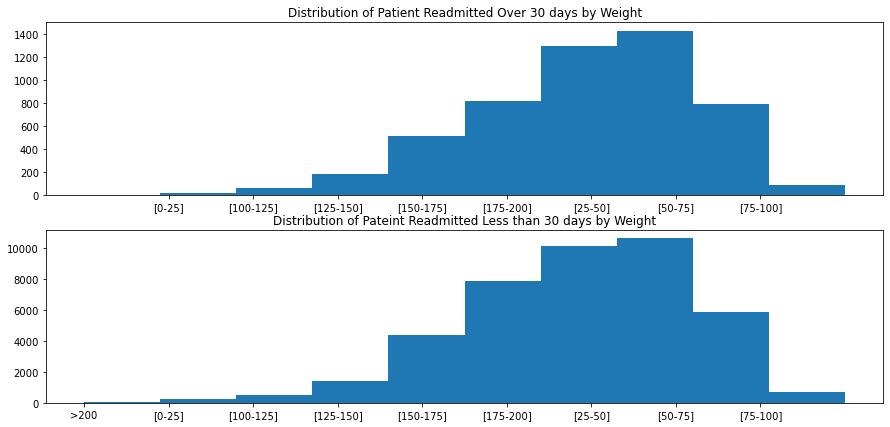

In [46]:
# distribution of weight if readmitted 
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
x_labels = []
weight = X[X.readmitted_binary == 1][['weight']]
x = np.sort(weight.weight.unique()).astype('int')
for i in x:
    x_labels.append(enc.categories_[3].tolist()[i])
    

ax1.hist(age.age)
ax1.set_title('Distribution of Patient Readmitted Over 30 days by Weight')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)

weight1 = X[X.readmitted_binary == 0][['weight']]
x1 = np.sort(weight1.weight.unique()).astype('int')
x1_labels=[]
for i in x1:
    x1_labels.append(enc.categories_[3].tolist()[i])
ax2.hist(age1.age)
ax2.set_title('Distribution of Pateint Readmitted Less than 30 days by Weight')
ax2.set_xticks(x1)
ax2.set_xticklabels(x1_labels)


plt.show()


##### Interpretation
- there are no patients >200 that were readmitted in more than 30 days
- there are only 3 patients overall that are >200 (more than likely we should drop these values because there are not enough to work with)


In [47]:
# drop the 3 rows where weight is '>200'
over_weight = np.where(diab.weight == '>200')
diab.drop(labels = over_weight[0], axis=0, inplace = True)
diab.reset_index(inplace=True, drop=True)
#diab

In [48]:
diab.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_binary
0,Caucasian,Female,[0-10],[0-25],5,18,1,1,BC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20],[50-75],1,1,7,3,MD,Pediatrics,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30],[50-75],1,1,7,2,MD,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40],[75-100],1,1,7,2,HM,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50],[75-100],1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [49]:
diab.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted_binary'],
      dtype='object')

---
---

In [50]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101679 entries, 0 to 101678
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      101679 non-null  category
 1   gender                    101679 non-null  category
 2   age                       101679 non-null  category
 3   weight                    101679 non-null  category
 4   admission_type_id         101679 non-null  int64   
 5   discharge_disposition_id  101679 non-null  int64   
 6   admission_source_id       101679 non-null  int64   
 7   time_in_hospital          101679 non-null  int64   
 8   payer_code                101679 non-null  category
 9   medical_specialty         101679 non-null  category
 10  num_lab_procedures        101679 non-null  int64   
 11  num_procedures            101679 non-null  int64   
 12  num_medications           101679 non-null  int64   
 13  number_outpatient         101

---
## <font color='blue'>Modeling Preparations</font>
* Which methods are you proposing to utilize to solve the problem?  
     - We propose to use logistic regression to solve for if a person is readmitted to the hospital in more or less than 30 days
     - We will use undersampling since our data set is extremely unbalanced towards those who were not readmitted under 30 days. 
* Why is this method appropriate given the business objective? 
    - Logistic regression performs very well with response variables that are binary
    - Logistic regression is less likely to overfit the model than more complex methods
* How will you determine if your approach is useful (or how will you differentiate which approach is more useful than another)?
    - It's unclear whether it would be worse to keep a patient longer who would not have been readmitted, or to let a patient go home who will be readmitted. Without that domain knowledge, we will just try to get a model that has a good accuracy and balanced precision and recall. 
* More specifically, what evaluation metrics are most useful given that the problem is a binary-classification one (ex., Accuracy, F1-score, Precision, Recall, AUC, etc.)?
    - The model will be assessed using Accuracy in combination with Precision and Recall to ensure there is a balance of true positive and true negative results in the classifier.

---
## <font color='blue'>Modeling Building and Evaluations</font>
( questions and write up below the code)

In [51]:
# response variable breakout
diab.readmitted_binary.value_counts()

0    90328
1    11351
Name: readmitted_binary, dtype: int64

In [52]:
# randomly sample df to get even breakouts of response variable
diab_sampled = diab.groupby("readmitted_binary").sample(n=10000, random_state=42)
diab_sampled.readmitted_binary.value_counts()

0    10000
1    10000
Name: readmitted_binary, dtype: int64

In [53]:
diab_ohe=pd.get_dummies(diab_sampled[['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted_binary']],drop_first=True)

In [54]:
diab_ohe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 57344 to 46475
Data columns (total 2428 columns):
 #     Column                                                  Dtype
---    ------                                                  -----
 0     admission_type_id                                       int64
 1     discharge_disposition_id                                int64
 2     admission_source_id                                     int64
 3     time_in_hospital                                        int64
 4     num_lab_procedures                                      int64
 5     num_procedures                                          int64
 6     num_medications                                         int64
 7     number_outpatient                                       int64
 8     number_emergency                                        int64
 9     number_inpatient                                        int64
 10    number_diagnoses                                  

In [55]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [56]:
y=diab_ohe['readmitted_binary'].values
del diab_ohe['readmitted_binary']
X=diab_ohe.values

In [57]:
X_scale=scl.fit_transform(X)

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit 
num_cv_iterations = 10
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,random_state=42)
                         
print(cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None)


In [59]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator2(classifierEstimator, X, Y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, Y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(Y,predictions)
    confMat = confusion_matrix(Y,predictions)
    acc = accuracy_score(Y,predictions)
    
    print ('Class Report:',classReport)
    print('---------------')
    print ('Confusion Matrix:\n',confMat)
    print('---------------')
    print ('Accuracy:',acc)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



classifierEst =LogisticRegression(dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42,
          tol=0.0001, verbose=0, warm_start=False)
EvaluateClassifierEstimator2(classifierEst, X_scale, y, 5)

parameters_logreg = {'C': [1,10,100],
                    'class_weight': ['None','balanced'],
                    'solver': ['lbfgs', 'liblinear']}

log_reg = LogisticRegression()
GridSearch_LogReg = GridSearchCV(estimator = classifierEst,
                                n_jobs=16,
                                refit = 'accuracy_score',
                                verbose = 1,
                                param_grid=parameters_logreg,
                                cv=10,
                                scoring = 'accuracy')


Class Report:               precision    recall  f1-score   support

           0       0.58      0.60      0.59     10000
           1       0.59      0.57      0.58     10000

    accuracy                           0.58     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.58      0.58      0.58     20000

---------------
Confusion Matrix:
 [[6021 3979]
 [4338 5662]]
---------------
Accuracy: 0.58415


In [61]:
grid_fit = GridSearch_LogReg.fit(X_scale,y)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.58315     nan 0.58315 0.5832  0.5817      nan 0.5817  0.5817  0.58235
     nan 0.58235 0.5819 ]
  warnings.warn(


In [62]:
#display the best estimator parameters
GridSearch_LogReg.best_estimator_

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scale, y, test_size=0.5, random_state=42, stratify=y)

In [66]:
%matplotlib inline

import matplotlib.pyplot as plt

feat_labels = diab_ohe.columns[0:]



classifierEst.fit(X_scale, y)
importances = classifierEst.coef_[0]

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 135, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) age_[70-80]                                                                                                                             0.778887
 2) age_[60-70]                                                                                                                             0.714804
 3) age_[80-90]                                                                                                                             0.623729
 4) age_[50-60]                                                                                                                             0.583187
 5) age_[40-50]                                                                                                                             0.503075
 6) number_inpatient                                                                                                                        0.439333
 7) age_[30-40]                                                                                           

In [67]:
from sklearn.model_selection import StratifiedKFold
# create cross validation iterator
cv_clf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_clf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Helene\anaconda3\envs\ML7331\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

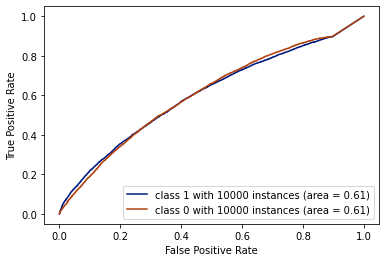

In [69]:
from sklearn import metrics as mt
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhat_score = np.zeros((y.shape[0],len(diab.readmitted_binary.unique())))

                      
for train, test in cv_object.split(X_scale,y):
                      classifierEst.fit(X[train],y[train])
                      yhat_score[test] = classifierEst.predict_proba(X[test])

# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

for i in np.random.permutation(2)[0:2]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## <font color='blue'>Modeling Building and Evaluations</font>
- Explain how you handled missing values
    - Missing values were imputed using the mode by age group in the ETL section above. It was also discovered that there were only 3 rows of data for the weight group '>200' so those values were dropped since only 3 rows is not sufficient for analysis. Each variable's imputation method was discussed in more detail in its own section above.
- Specify your sampling methodology
    - There were 2 classes of data in the response variable, <30 days and >30 days or not_readmitted. Since there was a big difference between yes (~ 11k) and no (~90k ), the data was downsampled to 10,000 yes and no responses for a total of 20,000 rows of data.

- Setup your model(s) 
- Analyze your model's performance - referencing your chosen evaluation metric (including supplemental visuals and analysis where appropriate)
    - Initially when we ran our base model, the accuracy was above 85%, but the recall and precision for the target variable (patients who did get readmitted in under 30 days) was less than 10%. The model was so focused on getting a high accuracy that it ignored the minority class of the response variable and was only predicting the majority class correctly. This rendered it practically useless when it came to any sort of business objective. 
    - After undersampling the data to correct for an unbalanced response variable, our model had a much lower accuracy - only 58% - but a much higher recall and precision for the minority variable (patients who did get readmitted in under 30 days).

---

## <font color='blue'>Model Interpretability and Explainability</font>
- Which variable(s) was (were) "most important" and why?  
    - Age was the most important factor for readmittance, with age group 70-80 being the highest risk to be readmitted in less than 30 days. 
    - The number of times a patient had been admitted to inpatient care previously was also a significant factor. The more times they had been admitted previously, the higher the chance they would be readmitted in less than 30 days. 
    - Medical specialty was the biggest factor that was negatively correlated with readmittance to the hospital in under 30 days. Those in the Internal Medicine category were less likely to get readmitted in the future. This could be for a number of reasons - possibly because Internal Medicine was the most common category following our imputation, or possibly because those cases were less severe than the cases of patients seeing other specialists. It's alsao possible that patients with internal medicine practicioners were more likely to see their doctors frequently following their initial inpatient admission, thus preventing their condition from getting worse and avoiding readmission. 
    - Having a diagnosis code of 617 also correlated with patients being less likely to be readmitted. (Although this knowledge is beyond the scope of the project and best left to subject matter experts) This is probably because that diagnosis code is for endometriosis which frequently co-occurs with diabeties. Once endometriosis is taken care of, often the diabeties will no longer be an issue either. 
    
    
- How did you come to the conclusion and how should your audience interpret this?
    - These conclusions were drawn from the coefficients provided by the feature importance analysis. 

## <font color='blue'>Case Conclusions</font>
- After all of your technical analysis and modeling; what are you proposing to your audience and why? 
    - Doctors and others who make decisions about whether to release a patient from the hospital should consider the factors mentioned above which can increase or decrease likelihood that patients will be readmitted in under 30 days. Holding patients for a few days longer if they have many risk factors could prevent costly readmissions. 
- How should they view your results and what should they consider when moving forward?  
    - The doctors and staff should pay particular attention the the age of the patient - people under 30 were less likely than those who are older to be readmitted in the short term. 
    - They should also consider comorbidities using their domain knowledge (as seen by certain diagnosis codes) to understand whether the issue with diabeties is being cuase by something else. If so, one the other problem is taken care of, it's unlikely the patient will be readmitted for diabeties. 
    - They can consider implicaitions that follow up care and proper instruction for managing their condition at home could prevent the patient from being readmitted (seeing an internal medicine specialist corresponded with lower readmission rate, possibly due to more frequent interaction out of the inpatient setting). 
- Are there other approaches you'd recommend exploring? 
    - There are more nuanced methods of imputation that could potentionally be used with further data available. Alternatively, better data collection being employed to have more information on weight for example would be useful, although it's understandable that if the patient is being admitted to an impatient ward, it would likely be difficult and detrimental to stop and measure weight. 
- This is where you "bring it all home" in language they understand.
    - This analysis can be used as a guide to supplement information for decision makers to help them see which patients are likely to be readmitted in less than 30 days. This will allow decision makers to take appropriate actions to reduce the likelyhood for those patients, whether that means holding them a few more days to ensure their condition is stable, or providing more intensive outpatient services. 